#  A/B test for boosting revenue

# Project description

You are an analyst at a big online store. Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue.
You need to prioritize these hypotheses, launch an A/B test, and analyze the results.


# Description of the data

**Data used in the first part of the project**

**hypotheses_us.csv**

* Hypotheses - brief descriptions of the hypotheses

* Reach -user reach, on a scale of one to ten

* Impact - impact on users, on a scale of one to ten

* Confidence - confidence in the hypothesis, on a scale of one to ten

* Effort - the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more           resource-intensive the test.

**Data used in the second part of the project**

**orders_us.csv**

* transactionId - order identifier

* visitorId - identifier of the user who placed the order

* date - of the order

* revenue - from the order

* group - the A/B test group that the user belongs to


**visits_us.csv**

* date - date

* group - A/B test group

* visits - the number of visits on the date specified in the A/B test group specified

# Preprocessing data <a id="one"></a>

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt



from scipy import stats as st

In [2]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

In [3]:
pd.set_option('display.max_colwidth', 0)

In [4]:
hypotheses.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1


In [5]:
hypotheses.columns= hypotheses.columns.str.lower()
hypotheses.tail()

,hypothesis,reach,impact,confidence,effort
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [6]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [7]:
orders = pd.read_csv('/datasets/orders_us.csv')

In [8]:
orders.head() 

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [9]:
orders.columns= orders.columns.str.lower()

In [10]:
orders.tail()

,transactionid,visitorid,date,revenue,group
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A
1196,3936777065,2108080724,2019-08-15,3120.1,B


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionid  1197 non-null   int64  
 1   visitorid      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [12]:
orders['date'] = orders['date'].astype('datetime64')

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [14]:
orders.describe()

,transactionid,visitorid,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


In [15]:
visits = pd.read_csv('/datasets/visits_us.csv')

In [16]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [17]:
visits['date'] = visits['date'].astype('datetime64')

In [18]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [19]:
visits.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [20]:
orders_a = orders.query('group == "A"')
orders_b = orders.query('group == "B"')

both_groups = pd.merge(orders_a, orders_b, how='inner', on = ['visitorid'])
print('Number of pucrchases made by users observed in both groups:', pd.Series(len(both_groups)))
both_groups.sample()

Number of pucrchases made by users observed in both groups: 0    183
dtype: int64


,transactionid_x,visitorid,date_x,revenue_x,group_x,transactionid_y,date_y,revenue_y,group_y
119,3743515850,2579882178,2019-08-18,30.6,A,131747281,2019-08-18,305.6,B


In [21]:
bad_list = both_groups['visitorid']
full_orders = orders.copy()
orders = orders[-orders['visitorid'].isin(bad_list)]
orders.info()
full_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1016 non-null   int64         
 1   visitorid      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object 

**for prepering the data for analyses i predormed the following steps.**

**hypotheses:**

* seprated columns using max_colwidth.

* converted column headings to lowercase.

**orders** :

* converted column headings to lowercase.

* converted date column from object to datetime64.

* detected users in both groups and created clean data set withot them.

  
In the **visits** dataset:

* converted column headings to lowercase.

* converted date column from object to datetime64.

# Part 1. Prioritizing Hypotheses <a id="two"></a>

At the next part in order to prioritize the hypothses i will use 2 methods the first one is ICE which contain the following compontes:

* Impact — how strongly this update will affect the users, their experience, and their satisfaction with the product.

* Confidence — how sure you are that your product will affect them in this way

* Effort — how much will it cost to test the hypothesis

the 2'nd one is RICE has which have four components 3 of them are the same as in ICE and the fourth one is:

* Reach — how many users will be affected by the update you want to introduce.

the compontes are scaled in a 1-10 ladder and according to a specific formula of multiplying and dividing the components it helps us in prorotizing the hypothesesץ

ICE - (Impact * Confidence) / Effort

RICE - (Reach * Impact * Confidence) / Effort

**Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.**


In [22]:
hypotheses['ICE'] = hypotheses['impact'] * hypotheses['confidence']/hypotheses['effort']
hypotheses.sort_values(by='ICE', ascending = False)

,hypothesis,reach,impact,confidence,effort,ICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000


In [23]:
hypotheses['RICE'] = hypotheses['reach'] *hypotheses['impact'] * hypotheses['confidence']/hypotheses['effort']
hypotheses.sort_values(by='RICE', ascending = False)


,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0


As seen the prioritization of hypotheses changes when use RICE instead of ICE.
the reason is that the reach factor is coming in and hypothesis with strong reach factor xlimbs up the table:

* in ICE "launch birthday promotion" comes first but since it gets only 1 at the reach factor it goes to 5'th place in RICE

* "Add a subscription" comes first in RICE with reach factor of 10 whil in ICE it came 3'rd.

* "Add product recommendation blocks to the store's site" comes 2'nd with RICE after 5'th place with ICE since it got 8 at reach factor.

* "change backround" hypothesis comes lat at both frameworks with low grades across all factors.

# Part 2. A/B Test Analysis

**2.1 Graph cumulative revenue by group.**

In [24]:
orders

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


In [25]:
visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [26]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,74576.7,17708
58,2019-08-30,A,460,437,52363.7,18037
59,2019-08-30,B,531,511,77863.5,18198
60,2019-08-31,A,468,445,53212.0,18736


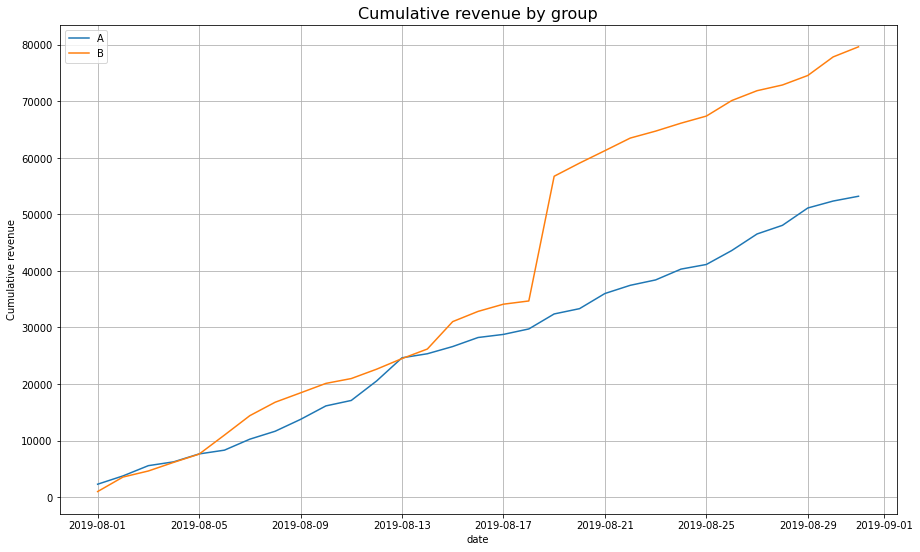

In [27]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15, 9))
# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('date')
plt.ylabel('Cumulative revenue')
plt.title('Cumulative revenue by group', fontsize =16 )
plt.grid()

plt.legend()

plt.show()

By looking at the cumulative revenue graph we can see that it started pretty much the same but since the last meeting point group B Climbs well above group A and maintains a constant distance.
we can see a steep rise at group B around 2019-08-13 probably a very large purchase/s.
could be as a result of a outlier will be checked ahead.

**2.2 Graph cumulative average order size by group.**

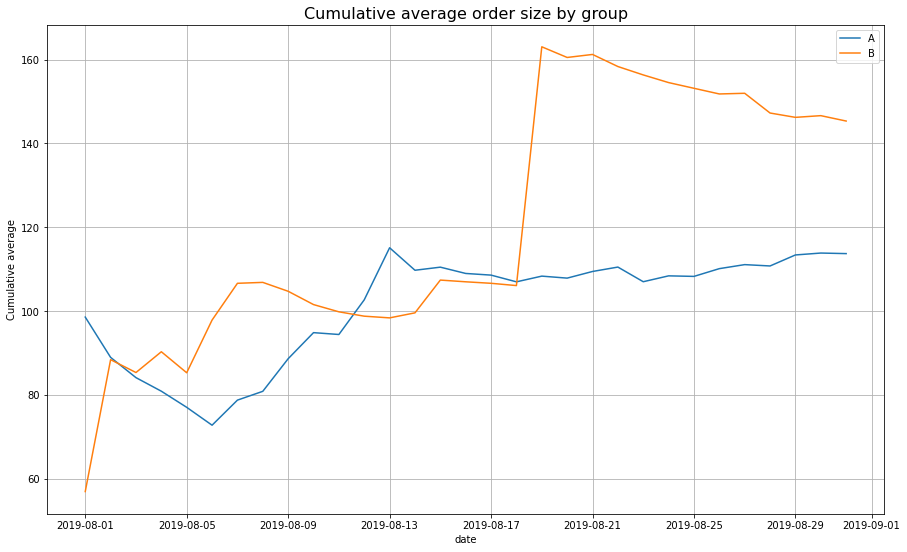

In [28]:
plt.figure(figsize=(15, 9))
plt.title('Cumulative average order size by group', fontsize =16)

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xlabel('date')
plt.ylabel('Cumulative average')
plt.grid()
plt.legend()

plt.show()

The cumulative metrics of the A group are almost consistently lower than those of the B group. At the beginning of the test, fluctuation in avearage was observed in both groups similar to revenue. The graph stabilized only toward the end of the test.
with same steep rise which Reinforces the claim of a large purchase that also seems to have greatly increased the average in Group B that is off course on top.

**2.3 Graph the relative difference in cumulative average order size for group B compared with group A.**

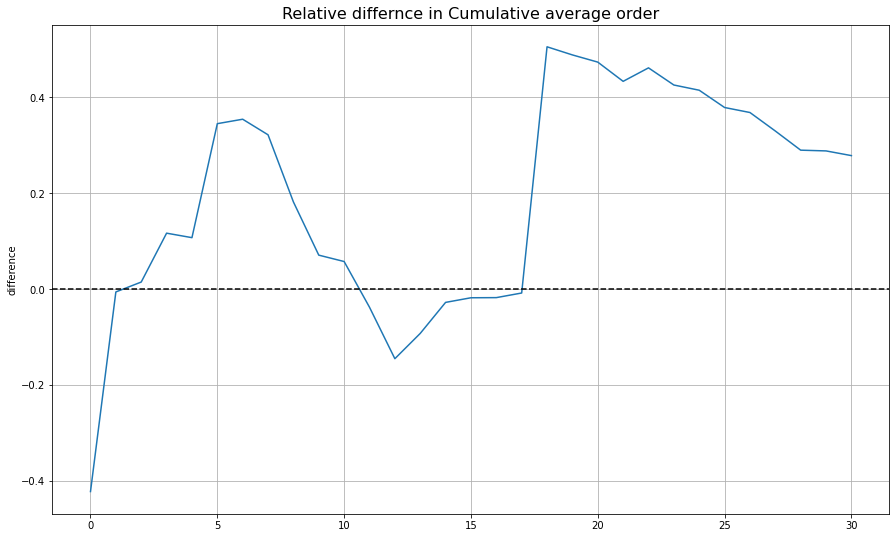

In [29]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
rell_diff = (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1
plt.rcParams['figure.figsize'] = (15,9)

plt.title('Relative differnce in Cumulative average order', fontsize =16)
# adding the X axis
rell_diff.plot(x ='date')
plt.ylabel('difference')
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()
# plotting a relative difference graph for the average purchase sizes


plt.show()

The A group almost consistently demonstrates worse revenue rates than the B group, and the difference is growing with time.
actualy group B is even started below group A with -0.4 but passes it pretty fast with a small downhill at about the 10'th day which made group A go above it up until the 17-18'th day where group B is sky rockets and passing the  average of A by fare.

**2.4 Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference.**

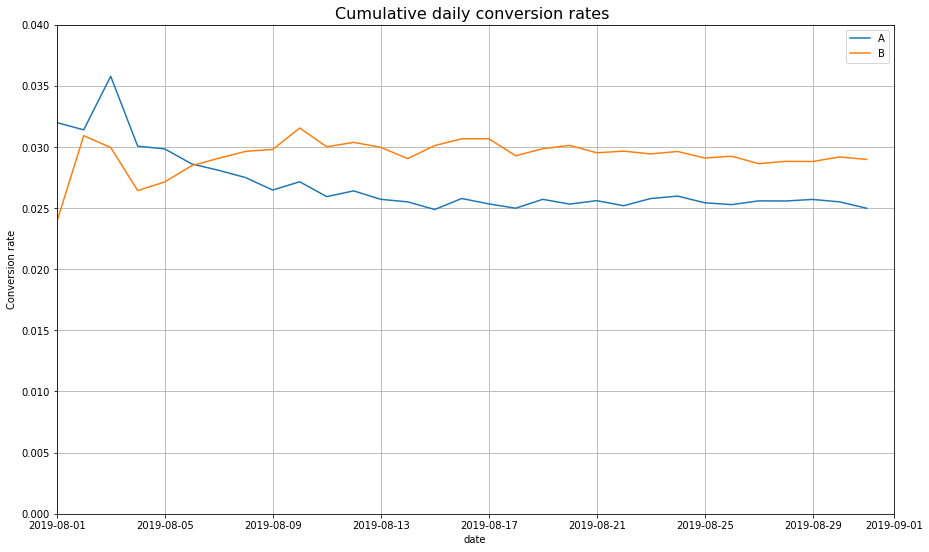

In [30]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# plotting the graphs
plt.figure(figsize=(15, 9))
plt.title('Cumulative daily conversion rates ', fontsize =16)
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xlabel('date')
plt.ylabel('Conversion rate')
plt.grid()
plt.legend()

# setting the axes' scale
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), 0, 0.04])
plt.show()

By looking at graph above it seems that the groups were fluctuating with better start to group A, but then the conversion rate of group B rose before stabilizing, while the conversion rate of group B dropped but then stabilized, too.
with over 3% coversion for group B and under 3% coversion for group A.

**2.5 Plot a scatter chart of the number of orders per user.**

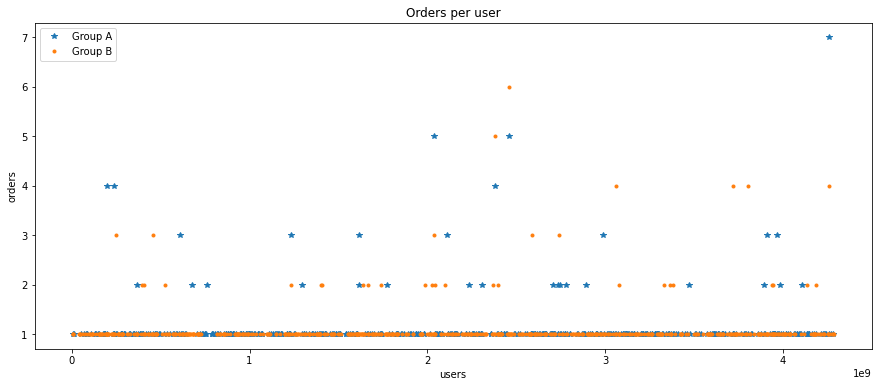

In [31]:
#calculating number of orders per user
ord_usr = orders.groupby('visitorid')['transactionid'].count()

ord_usr_a = orders_a.groupby(['visitorid'])['transactionid'].count()
ord_usr_b = orders_b.groupby(['visitorid'])['transactionid'].count()

#visualizing
plt.rcParams['figure.figsize'] = (15,6)
plt.title('Orders per user')
ord_usr_a.plot(style ='*', label = 'Group A')
ord_usr_b.plot(style ='.', label = 'Group B')
plt.ylabel('orders')
plt.xlabel('users')
plt.legend()
plt.show()

Most of users had only 1 order.

some users had 2 orders ad few ordered 3, thos are probably anomalies.

we should think of ways to attract users come back and order more from us in shorter times.


**2.6 Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.**

In [32]:
orders_by_users= orders.drop(['group','revenue','date'], axis=1).groupby('visitorid', as_index=False).agg({'transactionid':'count'})
orders_by_users.columns = ['visitorid','orders']
orders_by_users

,visitorid,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1
...,...,...
968,4259830713,1
969,4278982564,1
970,4279090005,1
971,4281247801,1


In [33]:
print('precentiles: 90%, 95%, 99%:', np.percentile(orders_by_users['orders'], [90,95,99]))

precentiles: 90%, 95%, 99%: [1. 1. 2.]


This encourages our previous claim regarding anomalies only at the 99% precentile we had 2 orders.
i will define users with more than 1 order as an anomaley.

**2.7 Plot a scatter chart of order prices.**

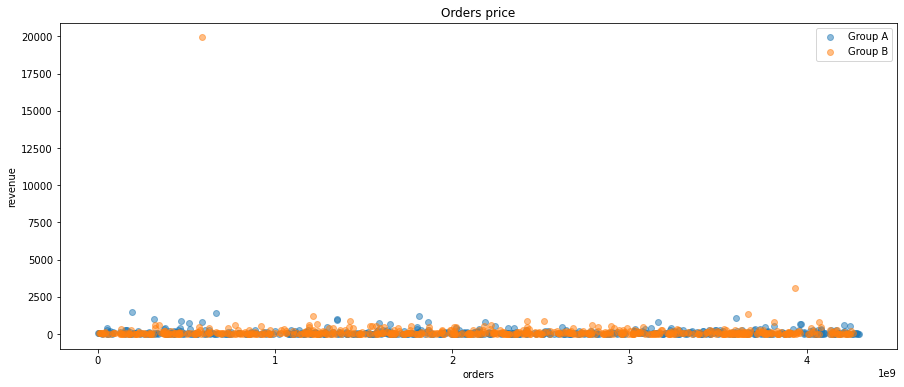

In [34]:

plt.rcParams['figure.figsize'] = (15,6)
plt.title('Orders price')
plt.scatter(orders_a['transactionid'], orders_a['revenue'], label='Group A', alpha = 0.5)
plt.scatter(orders_b['transactionid'], orders_b['revenue'], label='Group B', alpha = 0.5)
plt.ylabel('revenue')
plt.xlabel('orders')
plt.legend()
plt.show()

This graph can maybe tell us of how group B average order size suddenly rose and a one very large order of almost 20,000$ may be the cause.

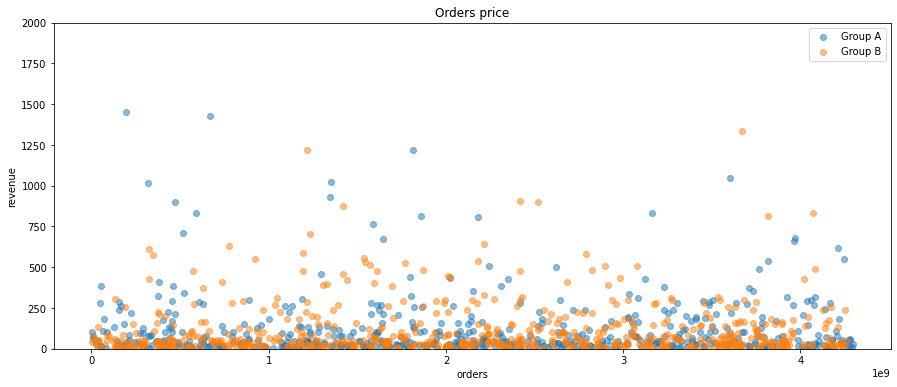

In [35]:
plt.rcParams['figure.figsize'] = (15,6)
plt.title('Orders price')
plt.scatter(orders_a['transactionid'], orders_a['revenue'], label='Group A', alpha = 0.5)
plt.scatter(orders_b['transactionid'], orders_b['revenue'], label='Group B', alpha = 0.5)
plt.ylabel('revenue')
plt.xlabel('orders')
plt.ylim(0,2000)
plt.legend()
plt.show()

We can see that most order prices are far below 250 (closer to 0) that means orders on small amount of money and above there are some orders that are close to the 250 line and above and fewer orders prices are above them starting to look as anomalies.

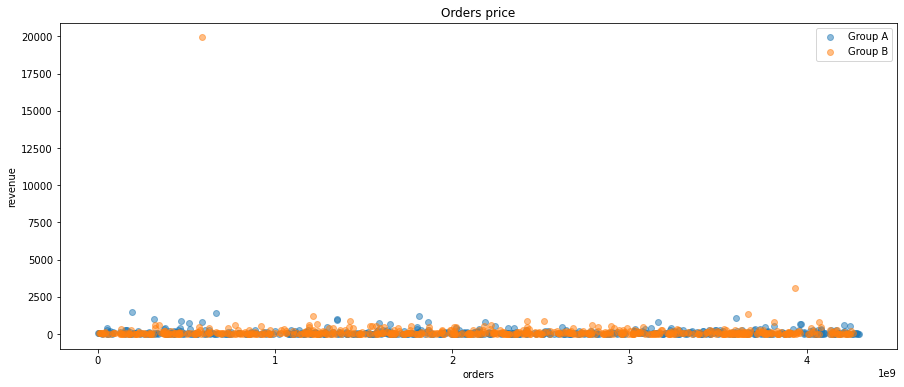

In [36]:
# the reviewer's cell:
plt.rcParams['figure.figsize'] = (15,6)
plt.title('Orders price')
plt.scatter(orders_a['transactionid'], orders_a['revenue'], label='Group A', alpha = 0.5)
plt.scatter(orders_b['transactionid'], orders_b['revenue'], label='Group B', alpha = 0.5)
plt.ylabel('revenue')
plt.xlabel('orders')
plt.legend()
plt.show()

**2.8 Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.**

In [37]:
print('precentiles: 90%, 95%, 99%:', np.percentile(orders['revenue'], [90,95,99]))

precentiles: 90%, 95%, 99%: [280.8   414.275 830.3  ]


* 90% of orders are less than 280.8$

* 95% of orders are less than 414$

* most of orders are less than 280 but there is 1% of orders that are even larger than 830$ 

by that information i will define orders over 414.275$ as an anomalies.

**2.9 Find the statistical significance of the difference in conversion between the groups using the raw data.** 

HO: Conversion rates are equal for both groups.

H1: Conversion rates are not equal for both groups.

In [38]:
alpha = 0.05

ordersByUsersA = orders[full_orders ['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorid', 'transactionid']

ordersByUsersB = orders[full_orders ['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorid', 'transactionid']

sampleA = pd.concat([ordersByUsersA['transactionid'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['transactionid'])), name='transactionid')],axis=0)

sampleB = pd.concat([ordersByUsersB['transactionid'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['transactionid'])), name='transactionid')],axis=0)

print('Relative gain: ', "{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

result  = st.mannwhitneyu(sampleA, sampleB)[1]

print('p.value: ', "{0:.3f}".format(result))

if (result < alpha):
      print('We reject the null hypothesis')
else:
      print("We can't reject the null hypothesis") 

Relative gain:  0.160
p.value:  0.011
We reject the null hypothesis


/tmp/ipykernel_63/2755662708.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ordersByUsersA = orders[full_orders ['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
/tmp/ipykernel_63/2755662708.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ordersByUsersB = orders[full_orders ['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})


By looking at the raw data we can obtain that:

* there is differnce between the groups and we reject the null hypothesis that they are the same.

* the p value stands on 0.011 which is lower than 0.05.

* Relative gain of group B is 16%.

**2.10 Find the statistical significance of the difference in average order size between the groups using the raw data.** 

HO: average order size are equal for both groups.

H1: average order size are not equal for both groups.

In [39]:
print('significance of difference ', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

result1 = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

print('p.value: ', '{0:.3f}'.format(result1))

if (result1 < alpha):
     print('We reject the null hypothesis')
else:
      print("We can't reject the null hypothesis") 

significance of difference  0.278
p.value:  0.862
We can't reject the null hypothesis


By looking at the raw data we can obtain that:
* The P-value is much higher than 0.05 so we cant reject the null hypothesis.

* Average order size for group B is 27.8% bigger then group A average order size.





**2.11 Find the statistical significance of the difference in conversion between the groups using the filtered data.** 

HO: Conversion rates without anomalies are equal for both groups.

H1: Conversion rates without anomalies are not equal for both groups.

In [40]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['transactionid'] > 1]['visitorid'], ordersByUsersB[ordersByUsersB['transactionid'] > 1]['visitorid']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 414.275]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head())
print(abnormalUsers.shape)

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorid, dtype: int64
(86,)


86 users have been detected as cause to anomalies checkind data without them,

In [41]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))]['transactionid'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['transactionid'])),name='transactionid')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]['transactionid'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['transactionid'])),name='transactionid')],axis=0)
print('Relative gain: ', "{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

result2  = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]

print('p.value: ', "{0:.3f}".format(result2))

if (result2 < alpha):
      print('We reject the null hypothesis')
else:
      print("We can't reject the null hypothesis") 

Relative gain:  0.174
p.value:  0.016
We reject the null hypothesis


Results of old test 
Relative gain:  0.160
p-value:  0.011
We reject the null hypothesis

new test:
we can see that null hyptoesis is still rejected although p. value has slightly increased.
Relative gain rose to 17.4%
groups has differnces between them.

**2.12 Find the statistical significance of the difference in average order size between the groups using the filtered data.** 

HO: average order size without anomalies are equal for both groups.

H1: average order size  without anomalies are not equal for both groups.

In [42]:
print('significance of difference ', '{0:.3f}'.format(orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1))
result3 = st.mannwhitneyu(orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1]

print('p.value: ', '{0:.3f}'.format(result3))

if (result3 < alpha):
     print('We reject the null hypothesis')
else:
      print("We can't reject the null hypothesis") 

significance of difference  -0.033
p.value:  0.771
We can't reject the null hypothesis


old results:
significance of difference  0.278
p.value:  0.862
We can't reject the null hypothesis

* we still can't reject the null hypothesis p-value has sligthly decreaced bit not in a way that will affect the results.

*  the significance of difference has changed a lot without anomlies a result of what we talked about early on a large purchase that been removed and put group a in a better position in terms of average order size. 


**2.13 Make a decision based on the test results. The possible decisions are:**
1. Stop the test, consider one of the groups the leader.
2. Stop the test, conclude that there is no difference between the groups.
3. Continue the test.

Based on A/B test research i have decided to stop the test from thw following resaons:

* strating from the end there is a statistically  difference in conversion between the groups that is occure by using raw data or the filtered data. meaning the conversion rate of group B is higher than conversion rate for group A, therefore group B can  improve our conversion rates.

* as for average order size we can see that there is no statistically significant difference by using raw data or the filtered data. meaning we didn't effect the average order size.

in cunclusion we can obtain that **group B presented better results** and our test can be declared as a success.